What We'll Include in the Report:
Section	Visual Type	Shows
🔐 Data Classification Count	Bar chart	How many columns are PII, Financial, etc.
👥 Access Violations	Table	Employees who accessed restricted data
🧪 Data Quality Summary	Table / Bar Chart	Missing, duplicate, or invalid values per file
☁️ Cloud Migration Readiness	Bar chart	Eligible vs Blocked datasets

🛠️ Tools:
Python

matplotlib and seaborn for charts

Pandas DataFrames for table-like Power BI visuals

C:\Users\naufi\AppData\Local\Temp\ipykernel_27384\111452163.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tagged, x='data_classification', palette='pastel')


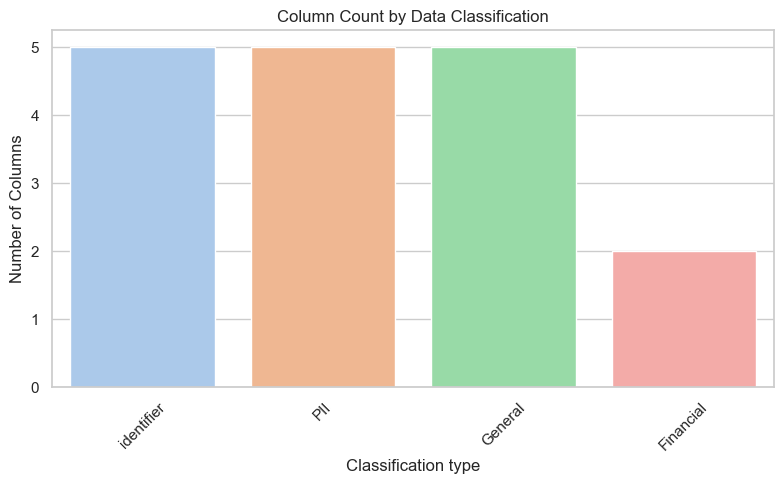

<Figure size 1000x500 with 0 Axes>

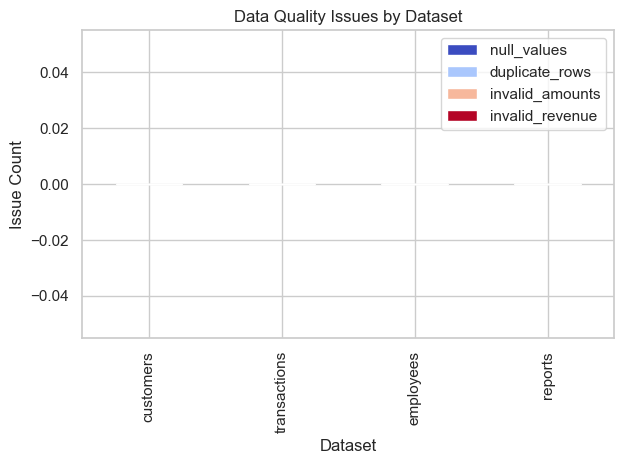

C:\Users\naufi\AppData\Local\Temp\ipykernel_27384\111452163.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=migration, x='migration_status', palette='muted')


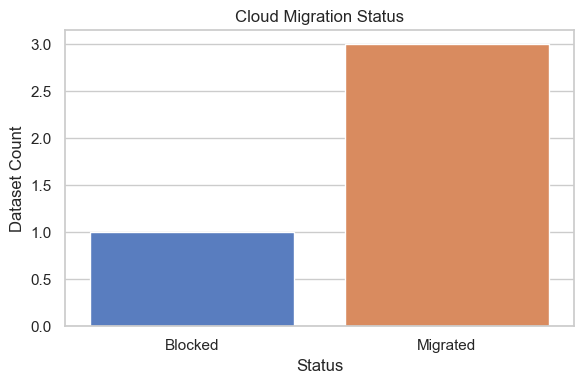

,employee_id,name,role,access_level,dataset_name,pipeda_flag
0,EMP223,Stacey Arias,analyst,read_write,customers,violation - Unauthorized PII Access
1,EMP232,Ricardo Young,intern,read,customers,violation - Unauthorized PII Access
2,EMP238,Heather Ashley,intern,read,customers,violation - Unauthorized PII Access
3,EMP241,James Burgess,intern,read_write,customers,violation - Unauthorized PII Access
4,EMP248,Amanda Harris,analyst,read_write,customers,violation - Unauthorized PII Access
5,EMP250,James Ochoa,analyst,read_write,customers,violation - Unauthorized PII Access
6,EMP271,Jacob Edwards,analyst,read_write,customers,violation - Unauthorized PII Access
7,EMP273,Joseph Mcintyre,analyst,read,customers,violation - Unauthorized PII Access
8,EMP295,Blake Gonzalez,intern,read,customers,violation - Unauthorized PII Access


In [9]:
#step 1 : Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set chart style
sns.set(style='whitegrid')

#Step 2 : Load required files
#Load datasets
tagged = pd.read_csv('tagged_catalog.csv')
violations = pd.read_csv('pipeda_violations.csv')
quality = pd.read_csv('data_quality_report.csv')
migration = pd.read_csv('cloud_migration_report.csv')

#step 3 : Data classification count(Bar chart)
plt.figure(figsize=(8,5))
sns.countplot(data=tagged, x='data_classification', palette='pastel')
plt.title('Column Count by Data Classification')
plt.xlabel('Classification type')
plt.ylabel('Number of Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Step 4: Data Quality Summary (Bar Chart)
plt.figure(figsize=(10,5))
quality.set_index('dataset')[['null_values','duplicate_rows','invalid_amounts','invalid_revenue']].plot(kind='bar',stacked=True,colormap='coolwarm')
plt.title("Data Quality Issues by Dataset")
plt.ylabel("Issue Count")
plt.xlabel("Dataset")
plt.tight_layout()
plt.show()

#Step 5: Cloud Migration Summary (Bar Chart)
if 'migration_status' in migration.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=migration, x='migration_status', palette='muted')
    plt.title('Cloud Migration Status')
    plt.xlabel('Status')
    plt.ylabel('Dataset Count')
    plt.tight_layout()
    plt.show()

# Step 6: Access Violation Table
# Show key access violation fields
violations[['employee_id', 'name', 'role', 'access_level', 'dataset_name', 'pipeda_flag']]

['employee_id', 'name', 'role', 'dataset_name', 'access_level', 'pipeda_flag']
